# Laboratorio 01 - Bandits
Integrantes:
- Ricardo Méndez
- Sara Echevería
- Melissa Pérez

Repositorio: https://github.com/Mendezg1/RL_Lab1

## Task 01

1. ¿Qué pasa si algunas acciones tienen probabilidades de cero?
    * Que algunas acciones tengan probabilidad de cero significa que durante la etapa de exploración nunca se llegó a explorar la posibilidad de tomar dicha acción en el estado en cuestión. El agente nunca la seleccionará pero no significa que sea una mala acción, simplemente no tiene registro del outcome o reward de tomarla.

2. ¿Qué pasa si la póliza es determinística?
    * π1(a) = 1 para algún a
    
    Significa que el agente siempre tomará la misma acción dado un estado, causando que el resto de acciones sean ignoradas a menos que la política sea actualizada. 

3. Investigue y defina a qué se le conoce como cada uno de los siguientes términos, asegúrese de definir en qué consiste cada una de estas variaciones y cómo difieren de los k-armed bandits:
- Contextual bandits
    * Como se puede inferir del nombre, Contextual bandits es una modificación al algoritmo de k-armed bandits donde se implementa un contexto adicional para convertirse en un algoritmo más personalizado. Esto se obtiene a través de utilizar una matriz mxn en vez de un array n de 1d. Dado el contexto se tomaría la acción con mejor reward en la matriz. (Gupta, 2023)
- Dueling bandits
    * Al igual que el anterior, del nombre puede inferirse la logica de este nuevo problema de bandits. En vez de solo tomar un arm o brazo, se toman dos y tienen un 'duelo' para ver cuál es mejor en vez de estimar las recompensas de cada brazo. Para este problema se asume, comunmente, un ordenamiento de los brazos tal que si $i \succ j$, entonces $P_{ij} > \frac{1}{2}$. Este proceso daría dos nuevas nociones de pérdida:

    ![Pérdidas](images/duelling_regrets.PNG)

- Combination bandits
    * En este problema de bandits, en vez de escoger solo un 'arm', se escoge un subset o combinación de arms del set. El objetivo es maximizar la recompensa de la combinación. La noción de pérdida es la siguiente:
    
    ![Pérdida](images/combinatorial_regret.PNG)

Lattimore, T., & Szepesvári, C. (2020). Bandit algorithms. Cambridge University Press. https://banditalgs.com/

## Task 02

In [1]:
""" Implementación de:
    * Clases Bandit y Agent
    * Ejecución de simulación
    * Experimentar con diferentes valores
    * Trazar recompensa acumulada
    * Trazar valores estimados para cada brazo vs. probabilidad real
"""

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#clase Bandit
class Bandit:
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        self.probabilities = np.random.rand(n_arms)
        
    def pull(self, arm):
        return 1 if np.random.rand() < self.probabilities[arm] else 0

In [3]:
#clase Agent
class Agent:
    def __init__(self, n_arms=10, epsilon=0.1):
        self.epsilon = epsilon
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.values)

    def update_estimates(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        self.values[arm] += (1 / n) * (reward - value)

In [4]:
#simulacion
def run_simulation(epsilon, steps=1000):
    bandit = Bandit()
    agent = Agent(epsilon=epsilon)
    cumulative_reward = 0
    rewards_history = []

    for t in range(steps):
        arm = agent.select_arm()
        reward = bandit.pull(arm)
        agent.update_estimates(arm, reward)

        cumulative_reward += reward
        rewards_history.append(cumulative_reward)

    #impresion de resultados finales
    print(f"ε = {epsilon}")
    print("Probabilidades reales:")
    print(np.round(bandit.probabilities, 2))
    print("Estimaciones finales:")
    print(np.round(agent.values, 2))
    print(f"Recompensa acumulada: {cumulative_reward}\n")

    #recompensa acumulada - grafica 1
    plt.figure(figsize=(12, 5))
    plt.plot(rewards_history, label=f"ε = {epsilon}")
    plt.title(f"Recompensa Acumulada (ε = {epsilon})")
    plt.xlabel("Iteración")
    plt.ylabel("Recompensa acumulada")
    plt.grid(True)
    plt.legend()
    plt.show()

    #estimaciones vs probabilidades reales - grafica 2
    plt.figure(figsize=(12, 5))
    indices = np.arange(agent.n_arms)
    width = 0.35
    plt.bar(indices - width/2, bandit.probabilities, width=width, label="Reales")
    plt.bar(indices + width/2, agent.values, width=width, label="Estimadas")
    plt.title(f"Estimaciones vs Reales (ε = {epsilon})")
    plt.xlabel("Brazos")
    plt.ylabel("Valor")
    plt.xticks(indices)
    plt.grid(True)
    plt.legend()
    plt.show()

ε = 0.01
Probabilidades reales:
[0.32 0.35 0.89 0.47 0.75 0.59 0.67 0.37 0.56 0.37]
Estimaciones finales:
[0.32 0.   0.9  0.   0.   0.   0.   0.   0.   0.  ]
Recompensa acumulada: 630



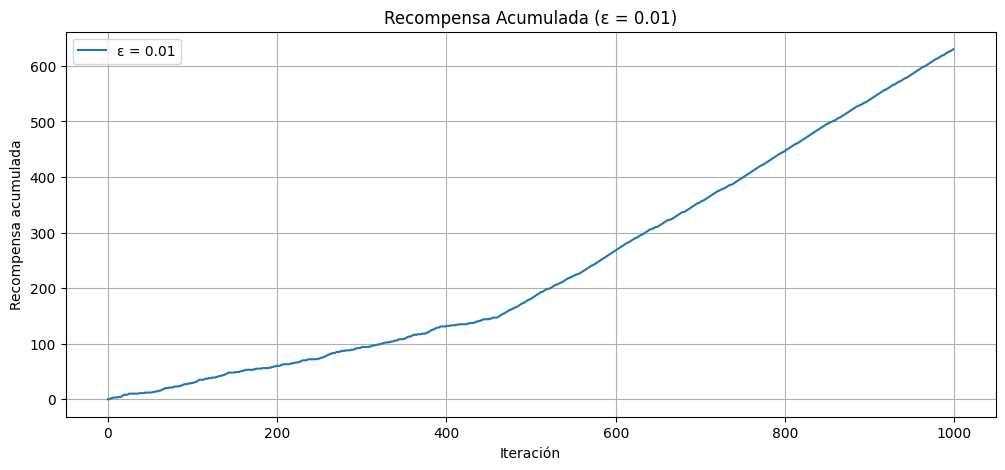

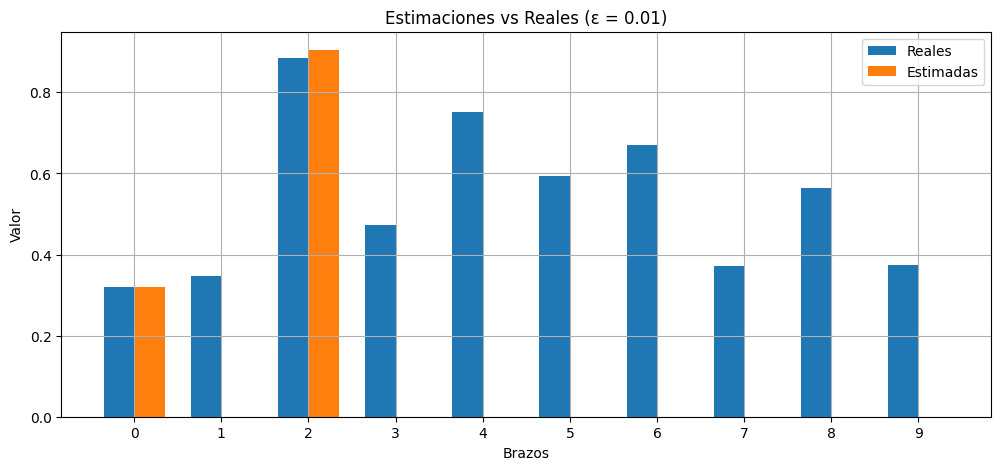

ε = 0.1
Probabilidades reales:
[0.33 0.76 0.77 0.79 0.1  0.7  0.59 0.15 0.54 0.37]
Estimaciones finales:
[0.46 0.75 0.64 0.13 0.   0.6  0.45 0.27 0.7  0.45]
Recompensa acumulada: 722



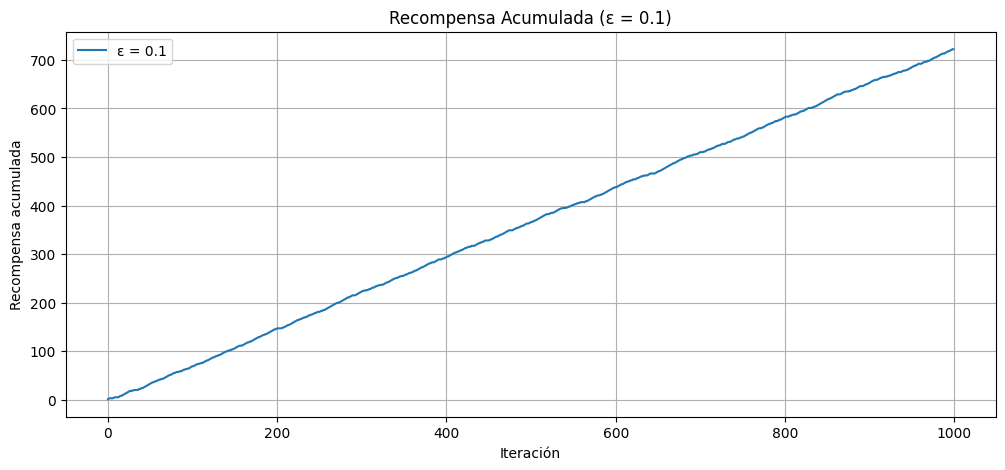

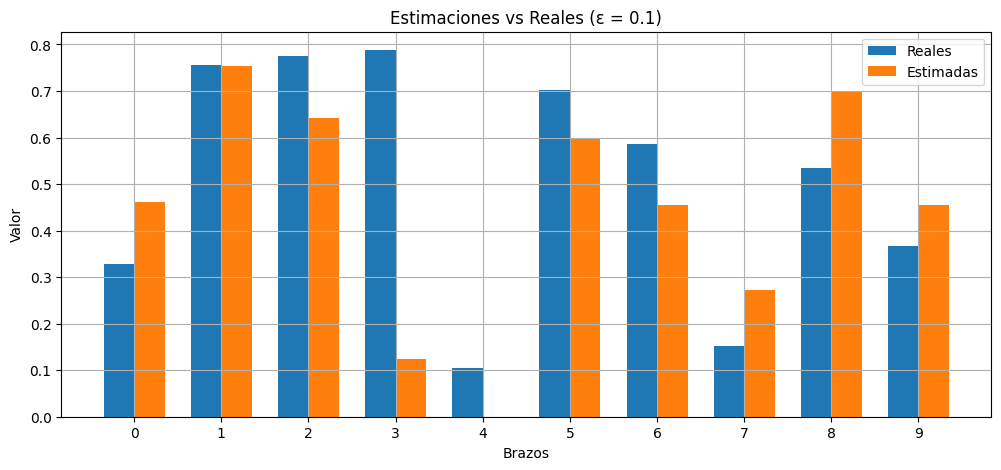

ε = 0.5
Probabilidades reales:
[0.79 0.56 0.38 0.96 0.23 0.42 0.58 0.61 0.94 0.89]
Estimaciones finales:
[0.69 0.46 0.42 0.97 0.29 0.56 0.63 0.59 0.96 0.85]
Recompensa acumulada: 801



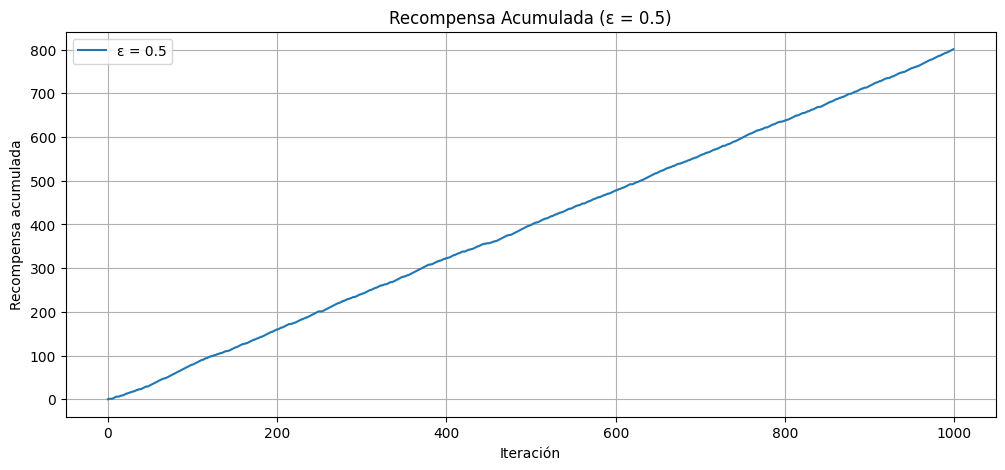

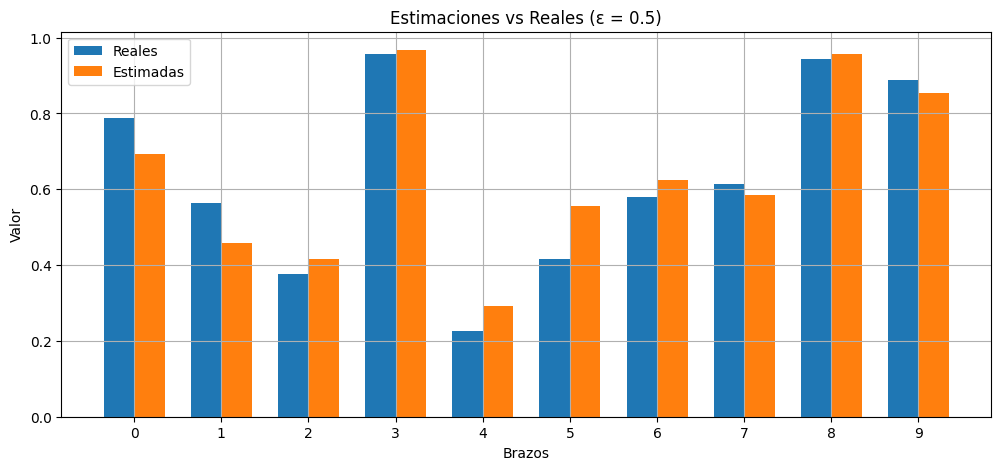

In [5]:
#simulacion 1
for eps in [0.01, 0.1, 0.5]:
    run_simulation(epsilon=eps)

## Conclusión

Al probar diferentes valores de ε, se notó que el comportamiento del agente cambia:

- Con **ε = 0.01**, casi no explora y puede quedarse con opciones que no son las mejores.
- Con **ε = 0.1**, explora lo suficiente y también aprovecha las mejores opciones que encuentra.
- Con **ε = 0.5**, explora mucho y no se enfoca en las mejores opciones, lo que baja su recompensa.

En general, un valor intermedio como 0.1 permitió al agente aprender mejor y obtener más recompensas.